In [1]:
import pandas as pd

In [16]:
import numpy as np

In [2]:
import os, glob

In [3]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [51]:
fs = glob.glob(os.path.join(root,'wave2web_data','*12x3*.csv'))

In [52]:
fs

['/home/jupyter/era5-gcp/wave2web_data/Kabini_12x3mo_split.csv',
 '/home/jupyter/era5-gcp/wave2web_data/Hemavathy_12x3mo_split.csv',
 '/home/jupyter/era5-gcp/wave2web_data/Harangi_12x3mo_split.csv',
 '/home/jupyter/era5-gcp/wave2web_data/Krisharaja Sagar_12x3mo_split.csv']

In [53]:
dfs = {os.path.splitext(os.path.split(f)[1])[0].split('_')[0]:pd.read_csv(f).set_index('Unnamed: 0') for f in fs}

In [54]:
for kk in dfs.keys():
    dfs[kk].index = pd.to_datetime(dfs[kk].index)

In [55]:
# build targets
for kk in dfs.keys():
    dfs[kk]['Y'] = dfs[kk]['PRESENT_STORAGE_TMC']
    for ii in range(5,60,5):
        dfs[kk][f'Y_{ii+1}'] = dfs[kk]['PRESENT_STORAGE_TMC'].shift(ii)

In [56]:
# add lagged feature
windows = [5,15,30,60,100]
for kk in dfs.keys():
    for window in windows:
        for variable in ['tp','t2m']:
            dfs[kk][f'lag_{variable}_{window}'] = dfs[kk][variable].rolling(window).mean()

In [ ]:
# add day-of-year feature


In [28]:
[f'{x}_{y}' for x in ['1','2'] for y in ['d','b']]

['1_d', '1_b', '2_d', '2_b']

In [29]:
np.random.choice(50,5)

array([27, 18, 28,  5, 37])

In [11]:
dfs.keys()

dict_keys(['Kabini', 'Hemavathy', 'Harangi', 'Krisharaja Sagar'])

In [19]:
for kk in dfs.keys():
    dfs[kk]['sin_dayofyear']=np.sin((dfs[kk].index.dayofyear - 1)/365*2*np.pi)

In [34]:
a = {'b':4,'d':6}

In [36]:
a.values()

dict_values([4, 6])

In [40]:
from datetime import timedelta, datetime

In [41]:
now = datetime.now()

In [63]:
np.stack([np.arange(12,0,-1)/np.arange(12,0,-1).sum()]*32)

array([[0.15384615, 0.14102564, 0.12820513, 0.11538462, 0.1025641 ,
        0.08974359, 0.07692308, 0.06410256, 0.05128205, 0.03846154,
        0.02564103, 0.01282051],
       [0.15384615, 0.14102564, 0.12820513, 0.11538462, 0.1025641 ,
        0.08974359, 0.07692308, 0.06410256, 0.05128205, 0.03846154,
        0.02564103, 0.01282051],
       [0.15384615, 0.14102564, 0.12820513, 0.11538462, 0.1025641 ,
        0.08974359, 0.07692308, 0.06410256, 0.05128205, 0.03846154,
        0.02564103, 0.01282051],
       [0.15384615, 0.14102564, 0.12820513, 0.11538462, 0.1025641 ,
        0.08974359, 0.07692308, 0.06410256, 0.05128205, 0.03846154,
        0.02564103, 0.01282051],
       [0.15384615, 0.14102564, 0.12820513, 0.11538462, 0.1025641 ,
        0.08974359, 0.07692308, 0.06410256, 0.05128205, 0.03846154,
        0.02564103, 0.01282051],
       [0.15384615, 0.14102564, 0.12820513, 0.11538462, 0.1025641 ,
        0.08974359, 0.07692308, 0.06410256, 0.05128205, 0.03846154,
        0.02564103,

In [61]:
now

datetime.datetime(2021, 7, 25, 14, 7, 43, 145169)

In [43]:
now.timestamp()

1627222063.145169

In [60]:
dfs['Kabini'].loc[(dfs['Kabini']['segment']=='val') & (dfs['Kabini']['segment']!=dfs['Kabini']['segment'].shift(1)),'segment'].index

DatetimeIndex(['2011-11-01', '2013-03-01', '2015-12-01', '2017-01-01',
               '2018-03-01', '2020-02-01'],
              dtype='datetime64[ns]', name='Unnamed: 0', freq=None)

In [39]:
[timedelta(days=ii) for ii in range(10)]

[datetime.timedelta(0),
 datetime.timedelta(days=1),
 datetime.timedelta(days=2),
 datetime.timedelta(days=3),
 datetime.timedelta(days=4),
 datetime.timedelta(days=5),
 datetime.timedelta(days=6),
 datetime.timedelta(days=7),
 datetime.timedelta(days=8),
 datetime.timedelta(days=9)]

In [33]:
~pd.isna(dfs['Kabini'][[f'tp_{ii}' for ii in range(15)]]).any(axis=1)

Unnamed: 0
2010-01-01    True
2010-01-02    True
2010-01-03    True
2010-01-04    True
2010-01-05    True
              ... 
2020-12-26    True
2020-12-27    True
2020-12-28    True
2020-12-29    True
2020-12-30    True
Length: 4017, dtype: bool

<AxesSubplot:xlabel='Unnamed: 0'>

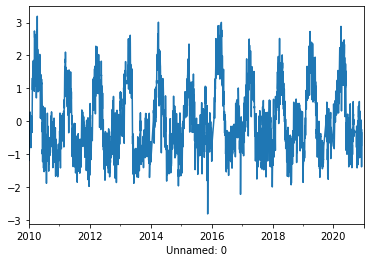

In [26]:
((dfs['Kabini']['t2m']-dfs['Kabini']['t2m'].mean())/dfs['Kabini']['t2m'].std()).plot()